# Workshop 2: Accessing Remote Hydrological Data

Accessing data from remote servers is a common task in environmental and climate sciences, where large datasets are often stored on institutional or public repositories. Several tools and protocols are available to facilitate this, depending on the format, structure, and access restrictions of the data. In this notebook we explore some commonly used methods.


[2.1. Manual data downloading](#manual_downloading)

[2.2.   Command line downloading](#cl_downloading)

[2.3.   Data access without downloading](#remote_access)




In [ ]:
%%capture
# Installing packages that are required above the ones already installed in Google Colab - ONLY NEEDS TO BE RUN IF USING GOOGLE COLAB
!pip install zarr cftime s3fs netCDF4==1.6.0

# If you are running this notebook in a platform other than Google Colab, please use the following command to install all the required packages. NOT REQUIRED FOR BINDER
#!python -m pip install -r requirements.txt

<a id='manual_downloading'></a>
# 2.1. Manual Data Downloading
~~Direct data download refers to the process of retrieving datasets from a remote server via a straightforward HTTP, HTTPS, or FTP/SFTP link.~~ This method is commonly used when data are stored as static files (e.g., NetCDF, CSV, GRIB) and made accessible through a direct URL. Users can download files manually through a browser. While this approach is simple and widely supported, it may be less efficient for accessing large datasets or performing repeated queries on multiple files, in which case more advanced methods may be preferable. Some tools are available, such as [Filezilla](https://filezilla-project.org/), for accessing FTP/SFTP servers for bulk downloads.

***Demonstration examples:***

https://environment.data.gov.uk/hydrology/explore

https://portal.grdc.bafg.de/applications/public.html?publicuser=PublicUser#dataDownload/Home


<a id='cl_downloading'></a>
# 2.2. Command Line Downloading

Datasets hosted on remote servers can be downloaded via ~~HTTP, HTTPS, or FTP~~ links using command-line tools in Linux. These methods are especially useful for automating bulk downloads from static URLs. With Linux shell scripting, such downloads can also be parallelised to efficiently handle multiple files simultaneously. This method downloads the full data available via the link being used, and most of the time can *only download full files.* ~~not download subsets of one file.~~

[Parallel computing](https://www.geeksforgeeks.org/computer-science-fundamentals/introduction-to-parallel-computing/) can significantly speed up the process of downloading large numbers of files from the command line. Instead of downloading files one at a time, multiple downloads can be done simultaneously, making efficient use of available ~~CPU and network~~*computing* resources. This approach is especially useful when working with large datasets with multiple files ~~or when accessing data from remote servers with high latency (i.e., delay in communication between your computer and the remote server).~~

***Demonstration examples:***

https://catalogue.ceh.ac.uk/documents/dbf13dd5-90cd-457a-a986-f2f9dd97e93c

https://www.ncei.noaa.gov/pub/data/


*Note: The ! operator in Python-based Jupyter Notebooks allows users to execute Linux shell commands directly from within the notebook, effectively stepping out of the Python environment to run system-level commands.*

### (i) Downloading single file *using command line*

In [ ]:
!wget https://catalogue.ceh.ac.uk/datastore/eidchub/dbf13dd5-90cd-457a-a986-f2f9dd97e93c/GB/monthly/CEH_GEAR_monthly_GB_1894.nc

--2025-09-11 10:45:10--  https://catalogue.ceh.ac.uk/datastore/eidchub/dbf13dd5-90cd-457a-a986-f2f9dd97e93c/GB/monthly/CEH_GEAR_monthly_GB_1894.nc
Resolving catalogue.ceh.ac.uk (catalogue.ceh.ac.uk)... 192.171.173.174
Connecting to catalogue.ceh.ac.uk (catalogue.ceh.ac.uk)|192.171.173.174|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 168418060 (161M) [application/x-netcdf]
Saving to: ‘CEH_GEAR_monthly_GB_1894.nc’

CEH_GEAR_monthly_GB 100%[===================>] 160.62M  22.1MB/s    in 8.4s    

2025-09-11 10:45:19 (19.2 MB/s) - ‘CEH_GEAR_monthly_GB_1894.nc’ saved [168418060/168418060]



*This has downloaded the data into the current working directory and can then be used within the script. To avoid storage issues in this notebook, we will remove this example file.*

In [ ]:
# For now we are deleting the data
!rm CEH_GEAR_monthly_GB_1894.nc

### (ii) Downloading restricted data

*Command line downloading also has options for including a username and password. Sometimes this can come in the form of an API key. The following code snippet is an example of how this can be done, it will not work if you attempt to run it.*

In [ ]:
# To use wget for multiple files or even ftp servers which are linked to your account and password protected you can use the following version
# For detailed example of accessing servers with password protection please see: https://eidc.ac.uk/help/getdata/downloadData
# Add your own username and password to download the whole catalogue.
# Please do not try this during the training session as it would take a lot time and storage space.
!wget --user=YOUR_USERNAME --password=YOUR_PASSWORD --auth-no-challenge https://catalogue.ceh.ac.uk/datastore/eidchub/dbf13dd5-90cd-457a-a986-f2f9dd97e93c

### (iii) Downloading multiple files

*In some instances multiple data files are grouped together into a single compressed folder, simplifying the download process. In this instance the single compressed folder can be downloaded and then the individual files extracted from this folder.*

In [ ]:
# Multiple files can be available to us sometimes in compressed format like the following
!wget https://www.ncei.noaa.gov/pub/data/hourly_precip-3240/01/3240_01_1948-1998.tar.Z

--2025-09-11 10:46:09--  https://www.ncei.noaa.gov/pub/data/hourly_precip-3240/01/3240_01_1948-1998.tar.Z
Resolving www.ncei.noaa.gov (www.ncei.noaa.gov)... 205.167.25.167, 205.167.25.171, 205.167.25.168, ...
Connecting to www.ncei.noaa.gov (www.ncei.noaa.gov)|205.167.25.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2812415 (2.7M) [application/x-tar]
Saving to: ‘3240_01_1948-1998.tar.Z’

3240_01_1948-1998.t 100%[===================>]   2.68M  8.42MB/s    in 0.3s    

2025-09-11 10:46:10 (8.42 MB/s) - ‘3240_01_1948-1998.tar.Z’ saved [2812415/2812415]



In [ ]:
%%capture
# There are command line methods to uncompress the datasets
!tar -zxvf 3240_01_1948-1998.tar.Z

*We will remove this data as we did earlier to clean the working directory*

In [ ]:
!rm 3240_*

*The wget command is also able to take in a text file as input. This text file should contain the list of URLs that we want to source data from. This method allows us to download multiple files with a single command.*

In [ ]:
# First as an example we create a txt file with urls we want to download
url_list = ['https://www.ncei.noaa.gov/pub/data/daily-grids/beta/by-month/1951/01/prcp-195101-cen-scaled.csv',
            'https://www.ncei.noaa.gov/pub/data/daily-grids/beta/by-month/1952/01/prcp-195201-cen-scaled.csv']

with open("urls.txt", "w") as outfile:
    outfile.write("\n".join(url_list))

!more urls.txt

https://www.ncei.noaa.gov/pub/data/daily-grids/beta/by-month/1951/01/prcp-195101
-cen-scaled.csv
https://www.ncei.noaa.gov/pub/data/daily-grids/beta/by-month/1952/01/prcp-195201
-cen-scaled.csv


In [ ]:
# Then use the text file with the URL list to download multiple files
!wget -i urls.txt

--2025-09-11 10:46:39--  https://www.ncei.noaa.gov/pub/data/daily-grids/beta/by-month/1951/01/prcp-195101-cen-scaled.csv
Resolving www.ncei.noaa.gov (www.ncei.noaa.gov)... 205.167.25.172, 205.167.25.178, 205.167.25.168, ...
Connecting to www.ncei.noaa.gov (www.ncei.noaa.gov)|205.167.25.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26279757 (25M) [text/csv]
Saving to: ‘prcp-195101-cen-scaled.csv’

prcp-195101-cen-sca 100%[===================>]  25.06M  36.7MB/s    in 0.7s    

2025-09-11 10:46:41 (36.7 MB/s) - ‘prcp-195101-cen-scaled.csv’ saved [26279757/26279757]

--2025-09-11 10:46:41--  https://www.ncei.noaa.gov/pub/data/daily-grids/beta/by-month/1952/01/prcp-195201-cen-scaled.csv
Connecting to www.ncei.noaa.gov (www.ncei.noaa.gov)|205.167.25.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26279757 (25M) [text/csv]
Saving to: ‘prcp-195201-cen-scaled.csv’

prcp-195201-cen-sca 100%[===================>]  25.06M  31.6MB/s    

In [ ]:
# For now we are deleting the data
!rm prcp* urls.txt

<a id='remote_access'></a>
# 2.3. Access Without Downloading

*In many instances,* hydroclimate data can be accessed remotely without downloading entire datasets. Multiple platforms allow users to query, subset, and stream data directly into analysis environments such as Python, R, or MATLAB. Some methods, such as APIs and FTP/HTTP ~~access~~, support dynamic data slicing using query parameters. However, remote data access more broadly enables scalable, on-demand computing by allowing users to process and analyze data without the need for local storage. Such remote access methods are increasingly critical for handling the growing volume of high-resolution climate data.

## 2.3.1. Data Access Protocols/Servers

These are servers that mostly designed to host/access large multidimensional scientific datasets (e.g., NetCDF or HDF formats) but are not suitable for other formats like CSV or JSON. Some types of these servers are: THREDDS (Thematic Real-time Environmental Distributed Data Services); OPeNDAP (Open-source Project for a Network Data Access Protocol). These can be accessed via scientific tools/libraries (e.g., xarray, netCDF4, nccopy, Panoply) or protocols like OPeNDAP allow client-side access via URLs (wget). There is some flexibility for accessing subset of data but no functionality for filtering by metadata or aggregation.

***Demonstration examples:***

https://www.nccs.nasa.gov/services/data-collections/land-based-products/nex-gddp-cmip6

https://ds.nccs.nasa.gov/thredds/catalog/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/catalog.html

https://ds.nccs.nasa.gov/thredds/catalog/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/catalog.html?dataset=AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_1950_v1.1.nc


### (i) Downloading via command line

In [ ]:
# You can use the "HTTPServer" URL to directly download the while file without any subsetting
#!wget https://ds.nccs.nasa.gov/thredds/fileServer/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_1950_v1.1.nc
#!rm pr_day_MIROC6_historical_r1i1p1f1_gn_1950_v1.1.nc

In [ ]:
# You can use the "NetcdfSubset" URL to directly download the file but you can also subset the data to your requirements
# Link here https://ds.nccs.nasa.gov/thredds/ncss/grid/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_1950_v1.1.nc/dataset.html
!wget -O test.nc "https://ds.nccs.nasa.gov/thredds/ncss/grid/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_1950_v1.1.nc?var=pr&north=40&west=66&east=100&south=8&horizStride=1&time=1950-12-31T12:00:00Z&&accept=netcdf3"

# -O flag in wget allows you to rename the file you are downloading

--2025-09-11 10:47:07--  https://ds.nccs.nasa.gov/thredds/ncss/grid/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_1950_v1.1.nc?var=pr&north=40&west=66&east=100&south=8&horizStride=1&time=1950-12-31T12:00:00Z&&accept=netcdf3
Resolving ds.nccs.nasa.gov (ds.nccs.nasa.gov)... 169.154.151.145, 2001:4d0:2418:2800::a99a:9791
Connecting to ds.nccs.nasa.gov (ds.nccs.nasa.gov)|169.154.151.145|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 76012 (74K) [application/x-netcdf]
Saving to: ‘test.nc’

test.nc             100%[===================>]  74.23K  --.-KB/s    in 0.08s   

2025-09-11 10:47:08 (937 KB/s) - ‘test.nc’ saved [76012/76012]



*We can then check that the data has downloaded correctly by importing the required packages and plotting the first layer of the test data.*

In [ ]:
# Importing packages
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

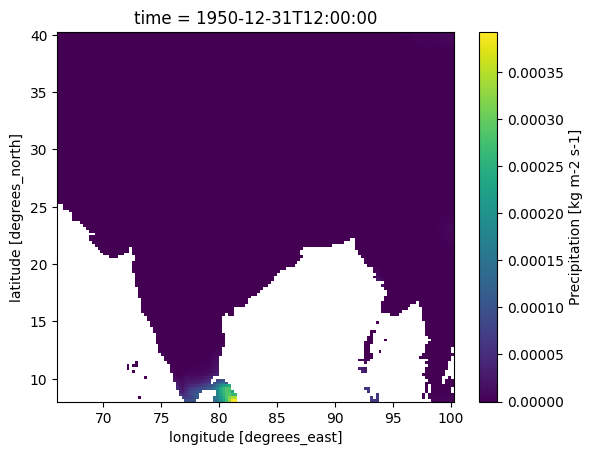

In [ ]:
# Plotting the downloaded data
f = xr.open_dataset("test.nc")
f['pr'][0].plot()

In [ ]:
# Deleting the downloaded data
!rm test.nc

### (ii) Loading data into Python without downloading

*The Xarray package in python includes support for OpenDAP which allows for the access of data using a URL without the need for downloading the data first. It is very important to note that this does not work with any URL, it specifically requires an OpenDAP URL.*

In [ ]:
# You can use the "OpenDAP" URL to directly load data into Python
# https://ds.nccs.nasa.gov/thredds/dodsC/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_1950_v1.1.nc.html
xr.open_dataset('https://ds.nccs.nasa.gov/thredds/dodsC/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_1950_v1.1.nc')

<xarray.Dataset> Size: 1GB
Dimensions:  (time: 365, lat: 600, lon: 1440)
Coordinates:
  * lat      (lat) float64 5kB -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
  * time     (time) datetime64[ns] 3kB 1950-01-01T12:00:00 ... 1950-12-31T12:...
  * lon      (lon) float64 12kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Data variables:
    pr       (time, lat, lon) float32 1GB ...
Attributes: (12/24)
    _NCProperties:                   version=2,netcdf=4.8.1,hdf5=1.12.2
    cmip6_source_id:                 MIROC6
    cmip6_institution_id:            MIROC
    cmip6_license:                   CC-BY 4.0
    activity:                        NEX-GDDP-CMIP6
    contact:                         Dr. Rama Nemani: rama.nemani@nasa.gov, D...
    ...                              ...
    title:                           MIROC6, r1i1p1f1, historical, global dow...
    resolution_id:                   0.25 degree
    history:                         2023-10-26T15:25:19.367680+00:00: instal...
    disclaimer:                      This data is considered provisional and ...
    external_variables:              areacella
    DODS_EXTRA.Unlimited_Dimension:  time

**Is the following cell maybe a little complicated? Possibly remove? xarray has the required functionality to subset so it's not essential to include this here**

In [ ]:
# The OpenDAP servers provide the functionality to subset the data as needed
xr.open_dataset("https://ds.nccs.nasa.gov/thredds/dodsC/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_1950_v1.1.nc?lat[0:1:100],pr[0:1:0][0:1:0][0:1:0],time[0:1:10],lon[0:1:100]")

<xarray.Dataset> Size: 2kB
Dimensions:  (time_1: 1, lat_1: 1, lon_1: 1, lat: 101, time: 11, lon: 101)
Coordinates:
  * lat      (lat) float64 808B -59.88 -59.62 -59.38 ... -35.38 -35.12 -34.88
  * time     (time) datetime64[ns] 88B 1950-01-01T12:00:00 ... 1950-01-11T12:...
  * lon      (lon) float64 808B 0.125 0.375 0.625 0.875 ... 24.62 24.88 25.12
Dimensions without coordinates: time_1, lat_1, lon_1
Data variables:
    pr       (time_1, lat_1, lon_1) float32 4B ...
Attributes: (12/24)
    _NCProperties:                   version=2,netcdf=4.8.1,hdf5=1.12.2
    cmip6_source_id:                 MIROC6
    cmip6_institution_id:            MIROC
    cmip6_license:                   CC-BY 4.0
    activity:                        NEX-GDDP-CMIP6
    contact:                         Dr. Rama Nemani: rama.nemani@nasa.gov, D...
    ...                              ...
    title:                           MIROC6, r1i1p1f1, historical, global dow...
    resolution_id:                   0.25 degree
    history:                         2023-10-26T15:25:19.367680+00:00: instal...
    disclaimer:                      This data is considered provisional and ...
    external_variables:              areacella
    DODS_EXTRA.Unlimited_Dimension:  time

**This cell is perhaps more important than the cell above**

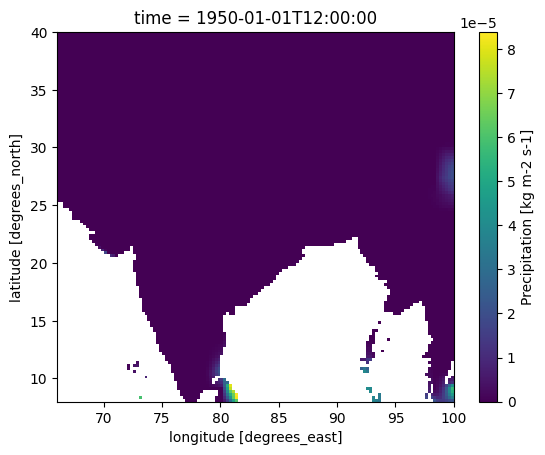

In [ ]:
# Or you can read the full data file and subset it using xarray
f = xr.open_dataset('https://ds.nccs.nasa.gov/thredds/dodsC/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_1950_v1.1.nc')
f.sel(lat=slice(8,40), lon=slice(66,100)).pr[0].plot()

### (iii) Reading in multiple files together

In [ ]:
# Using the "OpenDAP" URLs for different files, you can read multiple files together without downloading

# For this you would need to first create a list of the file URLs
base_url = 'https://ds.nccs.nasa.gov/thredds/dodsC/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_'
years = range(1950, 1952)  # Adjust the range as needed

file_urls = [f"{base_url}{year}_v1.1.nc" for year in years]
file_urls

['https://ds.nccs.nasa.gov/thredds/dodsC/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_1950_v1.1.nc',
 'https://ds.nccs.nasa.gov/thredds/dodsC/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_1951_v1.1.nc']

In [ ]:
# Then use the list of URLs to open all of them directly using xarray function to open multiple files
f = xr.open_mfdataset(file_urls, combine='by_coords')
f.sel(lat=slice(8,40), lon=slice(66,100))

<xarray.Dataset> Size: 51MB
Dimensions:  (time: 730, lat: 128, lon: 136)
Coordinates:
  * lat      (lat) float64 1kB 8.125 8.375 8.625 8.875 ... 39.38 39.62 39.88
  * time     (time) datetime64[ns] 6kB 1950-01-01T12:00:00 ... 1951-12-31T12:...
  * lon      (lon) float64 1kB 66.12 66.38 66.62 66.88 ... 99.38 99.62 99.88
Data variables:
    pr       (time, lat, lon) float32 51MB dask.array<chunksize=(365, 128, 136), meta=np.ndarray>
Attributes: (12/24)
    _NCProperties:                   version=2,netcdf=4.8.1,hdf5=1.12.2
    cmip6_source_id:                 MIROC6
    cmip6_institution_id:            MIROC
    cmip6_license:                   CC-BY 4.0
    activity:                        NEX-GDDP-CMIP6
    contact:                         Dr. Rama Nemani: rama.nemani@nasa.gov, D...
    ...                              ...
    title:                           MIROC6, r1i1p1f1, historical, global dow...
    resolution_id:                   0.25 degree
    history:                         2023-10-26T15:25:19.367680+00:00: instal...
    disclaimer:                      This data is considered provisional and ...
    external_variables:              areacella
    DODS_EXTRA.Unlimited_Dimension:  time

## 2.3.2. APIs (Application Programming Interfaces)
~~Now a days, m~~ Many data providers offer RESTful APIs that allow users to query and retrieve data programmatically. APIs are powerful for accessing dynamic content, filtering by time, location, or variable, and automating data workflows. The filtering can easily be done using Python scripts.

***Demonstration examples:***

[Climate Data Store](https://cds.climate.copernicus.eu/datasets/derived-era5-single-levels-daily-statistics?tab=overview)

[COSMOS API](https://cosmos-api.ceh.ac.uk/docs)

[COSMOS Data Access Python Snippets](https://cosmos-api.ceh.ac.uk/python_examples)

For the training session we will be accessing station observations from the [COSMOS-UK network](https://www.ceh.ac.uk/our-science/projects/cosmos-uk). We will be accessing observed variable of Daily Maximum Temperature Air (TA_MAX) from 2016--2022 for one of the COSMOS station, [Alice Holt (ALIC1)](https://cosmos.ceh.ac.uk/sites/ALIC1), directly from the API
![COSMOS_ALCI1.png](https://raw.githubusercontent.com/NERC-CEH/UKCEH_Summer_School/refs/heads/main/content/COSMOS_ALIC1.png)

### (i) Importing required packages

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime
import io
import json
import requests
import zipfile
import matplotlib.pyplot as plt

### (ii) Pre-written functions

*Many APIs include documentation with pre-written functions that you can copy into your script to access the data. The section below shows the functions sourced from the COSMOS documentation.*

In [2]:
# Here we are using these for accessing COSMOS data.
# Please see https://cosmos-api.ceh.ac.uk/python_examples for code examples
# Please see https://cosmos-api.ceh.ac.uk/docs for more details


def get_api_response(url, csv=False):
    """Helper function to send request to API and get the response

    :param str url: The URL of the API request
    :param bool csv: Whether this is a CSV request. Default False.
    :return: API response
    """
    # Send request and read response
    print(url)
    response = requests.get(url)

    if csv:
        return response
    else:
        # Decode from JSON to Python dictionary
        return json.loads(response.content)


def get_collection_parameter_info(params):
    """A function for wrangling the collection information into a more visually appealing format!"""
    df = pd.DataFrame.from_dict(params)
    df = df.T[["label", "description", "unit", "sensorInfo"]]

    df["unit_symbol"] = df["unit"].apply(lambda x: x["symbol"]["value"])
    df["unit_label"] = df["unit"].apply(lambda x: x["label"])
    df["sensor_depth"] = df["sensorInfo"].apply(
        lambda x: None if pd.isna(x) else x["sensor_depth"]["value"]
    )

    df = df.drop(["sensorInfo", "unit"], axis=1)

    return df


def format_datetime(dt):
    return dt.strftime("%Y-%m-%dT%H:%M:%SZ")


def read_json_collection_data(json_response):
    """Wrangle the response JSON from a COSMOS-API data collection request into a more usable format - in this case a Pandas Dataframe

    :param dict json_response: The JSON response dictionary returned from a COSMOS-API data collection request
    :return: Dataframe of data
    :rtype: pd.DataFrame
    """
    # The response is a list of dictionaries, one for each requested site

    # You can choose how you want to build your dataframes.  Here, I'm just loading all stations into one big dataframe.
    # But you could modify this for your own use cases.  For example you might want to build a dictionary of {site_id: dataframe}
    # to keep site data separate, etc.
    master_df = pd.DataFrame()

    for site_data in resp["coverages"]:
        # Read the site ID
        site_id = site_data["dct:identifier"]

        # Read the time stamps of each data point
        time_values = pd.DatetimeIndex(site_data["domain"]["axes"]["t"]["values"])

        # Now read the values for each requested parameter at each of the time stamps
        param_values = {
            param_name: param_data["values"]
            for param_name, param_data in site_data["ranges"].items()
        }

        # And put everything into a dataframe
        site_df = pd.DataFrame.from_dict(param_values)
        site_df["datetime"] = time_values
        site_df["site_id"] = site_id

        site_df = site_df.set_index(["datetime", "site_id"])
        master_df = pd.concat([master_df, site_df])

    return master_df

### (iii) Accessing Station Observations

*We can define a set of parameters that will be used to query the API to get the data we want.*

In [3]:
# We need to extract "ta_max" parameter for COSMOS station "ALIC1" over the period of 2016 -- 2022
start_date = format_datetime(datetime(2016, 1, 1))
end_date = format_datetime(datetime(2022, 12, 31))
query_date_range = f"{start_date}/{end_date}"
param_name = [
    "ta_max",
]
site_nm = "ALIC1"

*The following code snippet extracts the metadata for all COSMOS stations and then subsets it to the site name we defined in the snippet above (site_nm)*

In [5]:
# First we get the metadata for the COSMOS station
BASE_URL = "https://cosmos-api.ceh.ac.uk"
site_info_url = f"{BASE_URL}/collections/1D/locations"
site_info_response = get_api_response(site_info_url)

site_info = {}
for site in site_info_response["features"]:
    site_id = site["id"]
    site_name = site["properties"]["label"]
    coordinates = site["geometry"]["coordinates"]
    date_range = site["properties"]["datetime"]
    start_date, end_date = date_range.split("/")

    other_info = site["properties"]["siteInfo"]
    other_info = {key: d["value"] for key, d in other_info.items()}

    site_info[site_id] = {
        "site_name": site_name,
        "coordinates": coordinates,
        "start_date": start_date,
        "end_date": end_date,
    } | other_info

site_info_df = pd.DataFrame.from_dict(site_info).T
s_df = site_info_df[site_info_df.index == site_nm]
s_df

https://cosmos-api.ceh.ac.uk/collections/1D/locations


,site_name,coordinates,start_date,end_date,altitude,bulk_density,bulk_density_sd,land_cover,lattice_water,lattice_water_sd,soil_organic_carbon,soil_organic_carbon_sd,soil_type
ALIC1,Alice Holt,"[51.153551, -0.858232]",2015-03-06T13:30:00Z,2025-09-18T00:00:00Z,80.0,0.84,None,Broadleaf woodland,0.025,None,0.042,None,Mineral soil


**The below snippet may not be necessary**

In [ ]:
# Extracting the COSMOS station latitude and longitude from the whole metadata list
# COSMOS station latitude and longitude is required to calculate the nearest grid point on the CHESS grid to extract corresponding model data
site_latitude = s_df["coordinates"][0][0]
site_longitude = s_df["coordinates"][0][1]
print(
    "COMOS Site "
    + site_nm
    + " Latitude: "
    + str(site_latitude)
    + " Longitude: "
    + str(site_longitude)
)

COMOS Site ALIC1 Latitude: 51.153551 Longitude: -0.858232


/tmp/ipython-input-733139797.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  site_latitude = s_df["coordinates"][0][0]
/tmp/ipython-input-733139797.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  site_longitude = s_df["coordinates"][0][1]


*We can use the functions that we copied in from the documentation to query the data and extract the maximum temperature parameter.*

In [ ]:
# Extracting COSMOS TA_MAX data for the station over the required period into a pandas dataframe
query_url = f'{BASE_URL}/collections/1D/locations/{site_nm}?datetime={query_date_range}&parameter-name={",".join(param_name)}'
resp = get_api_response(query_url)
df = read_json_collection_data(resp)
df = df.reset_index()
display(df)
print(df.shape)

https://cosmos-api.ceh.ac.uk/collections/1D/locations/ALIC1?datetime=2016-01-01T00:00:00Z/2022-12-31T00:00:00Z&parameter-name=ta_max


,datetime,site_id,ta_max
0,2016-01-01 00:00:00+00:00,ALIC1,8.6
1,2016-01-02 00:00:00+00:00,ALIC1,10.7
2,2016-01-03 00:00:00+00:00,ALIC1,8.9
3,2016-01-04 00:00:00+00:00,ALIC1,9.6
4,2016-01-05 00:00:00+00:00,ALIC1,8.2
...,...,...,...
2552,2022-12-27 00:00:00+00:00,ALIC1,10.3
2553,2022-12-28 00:00:00+00:00,ALIC1,11.4
2554,2022-12-29 00:00:00+00:00,ALIC1,9.7
2555,2022-12-30 00:00:00+00:00,ALIC1,12.6


(2557, 3)


*This dataset can then be used like any other data in python. Below is an example of calculating monthly climatology using this data.*

In [ ]:
# Calculating monthly climatological values of TA_MAX for the station over 2016--2022
df_site = (
    df.groupby(pd.PeriodIndex(df["datetime"], freq="M"))["ta_max"].mean().reset_index()
)
df_site["datetime"] = df_site.datetime.dt.to_timestamp()
df_site = df_site.groupby(df_site["datetime"].dt.month).mean("ta_max")
df_site

,ta_max
datetime,
1,7.476959
2,8.877840
3,10.683410
4,13.541429
5,17.068664
6,19.837143
7,21.745315
8,21.484300
9,18.770476


## 2.3.3. Cloud Storage Access

Many datasets are now being hosted in cloud storages, especially for large-scale earth observation data. Tools like AWS CLI, boto3 (Python), gsutil, or cloud-native file systems (e.g., s3fs, gcsfs) allow seamless access to cloud-hosted data. Examples are AWS S3, Google Cloud Storage, Azure.

![Object_Store.png](https://raw.githubusercontent.com/NERC-CEH/UKCEH_Summer_School/refs/heads/main/content/Object_Store.png)


**OTHER RESOURCES:**
1. To hear more details for object storage please see the video on [JASMIN Object Storage: Optimizing Performance for Climate Research](https://www.youtube.com/watch?v=xJ8qEXQAri0&list=PLhF74YhqhjqnXvjzFCKnw4TGAFnkVu7Qn&index=2) from the JASMIN User Conference 2023.
2. As a self-learning exercise, we have included a [GitHub respository](https://github.com/NERC-CEH/object_store_tutorial) developed at UKCEH, linked in this workshop’s directory. It provides notebooks and guides on utilizing object storage.

***Demonstration examples:***

For the training session we will be accessing [CHESS-SCAPE data](https://dx.doi.org/10.5285/8194b416cbee482b89e0dfbe17c5786c), which has been stored in the [JASMIN Object Store](https://help.jasmin.ac.uk/docs/short-term-project-storage/using-the-jasmin-object-store/). We will extract the maximum daily air temperature (TASMAX) from four different ensemble members at the grid point closest to the Alice Holt station, and compare the CHESS-SCAPE data with COSMOS observational data.

### (i) Importing required packages and pre-written functions

In [ ]:
import fsspec
import s3fs
import zarr
import xarray as xr

In [ ]:
def open_zarr_from_s3(endpoint_url: str,
                      store_path: str):
    """
    Open a Zarr dataset hosted on an S3‑compatible object store.

    Parameters
    ----------
    endpoint_url : str
        Base S3 endpoint, e.g. "https://chess-scape-o.s3-ext.jc.rl.ac.uk".
    store_path : str
        Path to the Zarr store inside the bucket, e.g.
        "ens01-year100kmchunk/tmax_01_year100km.zarr".

    Returns
    -------
    xr.Dataset
        The opened Zarr dataset.
    """
    # 1. Create an fsspec filesystem for the S3 endpoint
    fs = fsspec.filesystem("s3", asynchronous=True, anon=True,
                           endpoint_url=endpoint_url,)

    # 2. Wrap it in a Zarr store
    zstore = zarr.storage.FsspecStore(fs, path=store_path)

    # 3. Open the dataset with xarray
    ds = xr.open_zarr(zstore, decode_times=True, decode_cf=True)

    return ds

### (ii) Exploring the data in Object Store

In [ ]:
# JASMIN Object Store tenancy we are using is chess-scape-o, the URL is as follows
jasmin_s3_url = "https://chess-scape-o.s3-ext.jc.rl.ac.uk"

In [ ]:
# s3fs is a python package that allows you to not only read the data but also explore the tenancy ()
# Here we will be using s3fs to list the bucket and not read the data, we read the data using intake package shown below
# For more information please see: https://pypi.org/project/s3fs/
s3 = s3fs.S3FileSystem(anon=True, client_kwargs={'endpoint_url': jasmin_s3_url})
s3.ls('s3://ens01-year100kmchunk/')

# In the output you see that within in the chess-scape-o tenancy, a bucket called ens01-year100kmchunk
# has 10 different zarr files for different 10 different variables. This is for a single chunk type tested.

['ens01-year100kmchunk/hurs_01_year100km.zarr',
 'ens01-year100kmchunk/huss_01_year100km.zarr',
 'ens01-year100kmchunk/pr_01_year100km.zarr',
 'ens01-year100kmchunk/psurf_01_year100km.zarr',
 'ens01-year100kmchunk/rlds_01_year100km.zarr',
 'ens01-year100kmchunk/rsds_01_year100km.zarr',
 'ens01-year100kmchunk/sfcWind_01_year100km.zarr',
 'ens01-year100kmchunk/tmax_01_year100km.zarr',
 'ens01-year100kmchunk/tmean_01_year100km.zarr',
 'ens01-year100kmchunk/tmin_01_year100km.zarr']

### (iii) Accessing data and the associated metadata

In [ ]:
# We are accessing TASMAX for the ensemble member #01 from the catalogue
chess_data_01 = open_zarr_from_s3(jasmin_s3_url, "ens01-year100kmchunk/tmax_01_year100km.zarr")
chess_data_01

/tmp/ipython-input-4023492614.py:27: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  ds = xr.open_zarr(zstore, decode_times=True, decode_cf=True)


<xarray.Dataset> Size: 100GB
Dimensions:  (y: 1057, x: 656, time: 36000)
Coordinates:
  * time     (time) object 288kB 1980-12-01 12:00:00 ... 2080-11-30 12:00:00
  * y        (y) float32 4kB 500.0 1.5e+03 2.5e+03 ... 1.056e+06 1.056e+06
  * x        (x) float32 3kB 500.0 1.5e+03 2.5e+03 ... 6.545e+05 6.555e+05
Data variables:
    lat      (y, x) float32 3MB dask.array<chunksize=(100, 100), meta=np.ndarray>
    tasmax   (time, y, x) float32 100GB dask.array<chunksize=(360, 100, 100), meta=np.ndarray>
    lon      (y, x) float32 3MB dask.array<chunksize=(100, 100), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    NCO:          4.7.3
    contact:      emrobi@ceh.ac.uk
    history:      Fri Mar 19 15:18:41 2021: cdo --sortname -add /gws/nopw/j04...
    institution:  CEH Wallingford - NERC
    project:      UK-SCAPE: SPEED

In [ ]:
# CHESS-SCAPE is on the British National Grid with Easting and Northing Coordinates.
# We also set the latitude and longitude as coordinates
chess_data_01 = chess_data_01.set_coords(("lat", "lon"))
chess_data_01

<xarray.Dataset> Size: 100GB
Dimensions:  (y: 1057, x: 656, time: 36000)
Coordinates:
    lat      (y, x) float32 3MB dask.array<chunksize=(100, 100), meta=np.ndarray>
    lon      (y, x) float32 3MB dask.array<chunksize=(100, 100), meta=np.ndarray>
  * time     (time) object 288kB 1980-12-01 12:00:00 ... 2080-11-30 12:00:00
  * y        (y) float32 4kB 500.0 1.5e+03 2.5e+03 ... 1.056e+06 1.056e+06
  * x        (x) float32 3kB 500.0 1.5e+03 2.5e+03 ... 6.545e+05 6.555e+05
Data variables:
    tasmax   (time, y, x) float32 100GB dask.array<chunksize=(360, 100, 100), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    NCO:          4.7.3
    contact:      emrobi@ceh.ac.uk
    history:      Fri Mar 19 15:18:41 2021: cdo --sortname -add /gws/nopw/j04...
    institution:  CEH Wallingford - NERC
    project:      UK-SCAPE: SPEED

In [ ]:
# Slicing for the time period 2016--2022
chess_data_01 = chess_data_01["tasmax"].sel(time=slice("2016-01-01", "2022-12-30"))
chess_data_01

<xarray.DataArray 'tasmax' (time: 2520, y: 1057, x: 656)> Size: 7GB
dask.array<getitem, shape=(2520, 1057, 656), dtype=float32, chunksize=(360, 100, 100), chunktype=numpy.ndarray>
Coordinates:
    lat      (y, x) float32 3MB dask.array<chunksize=(100, 100), meta=np.ndarray>
    lon      (y, x) float32 3MB dask.array<chunksize=(100, 100), meta=np.ndarray>
  * time     (time) object 20kB 2016-01-01 12:00:00 ... 2022-12-30 12:00:00
  * y        (y) float32 4kB 500.0 1.5e+03 2.5e+03 ... 1.056e+06 1.056e+06
  * x        (x) float32 3kB 500.0 1.5e+03 2.5e+03 ... 6.545e+05 6.555e+05
Attributes:
    long_name:      Maximum air temperature
    standard_name:  air_temperature
    units:          K

In [ ]:
%%capture
# Extracting data for the other ensemble members
# Ensemble member #04
chess_data_04 = open_zarr_from_s3(jasmin_s3_url, "ens04-year100kmchunk/tmax_04_year100km.zarr")
chess_data_04 = chess_data_04.set_coords(("lat", "lon"))
chess_data_04 = chess_data_04["tasmax"].sel(time=slice("2016-01-01", "2022-12-30"))

# Ensemble member #06
chess_data_06 = open_zarr_from_s3(jasmin_s3_url, "ens06-year100kmchunk/tmax_06_year100km.zarr")
chess_data_06 = chess_data_06.set_coords(("lat", "lon"))
chess_data_06 = chess_data_06["tasmax"].sel(time=slice("2016-01-01", "2022-12-30"))

# Ensemble member #15
chess_data_15 = open_zarr_from_s3(jasmin_s3_url, "ens15-year100kmchunk/tmax_15_year100km.zarr")
chess_data_15 = chess_data_15.set_coords(("lat", "lon"))
chess_data_15 = chess_data_15["tasmax"].sel(time=slice("2016-01-01", "2022-12-30"))

### (iv) Deriving the Observed Station nearest grid point on the Gridded Dataset

**Code from this point on maybe not necessary**

In [ ]:
# Function to derive the data for the nearest grid point to the station lat lon
def find_chess_tile(lat, lon, latlon_ref):
    """
    Created by Doran Khamis (dorkha@ceh.ac.uk)
    Function to calculate the nearest grid point
    of a given lat lon value within a gridded dataset
    The input data is the latitude, longitude of the station
    and the grid reference (latlon_ref) of the gridded dataset
    The function returns the y and x index for the gridded dataset
    which can be used to derive the nearest grid point
    This function assumes equal length lat/lon vectors in latlon_ref
    """
    dist_diff = np.sqrt(
        np.square(latlon_ref.lat.values - lat) + np.square(latlon_ref.lon.values - lon)
    )
    chesstile_yx = np.where(dist_diff == np.min(dist_diff))
    return chesstile_yx

In [ ]:
# We create a temporary CHESS-SCAPE gridded dataset array
chess_tmp = chess_data_01[0, :, :]
chess_tmp

<xarray.DataArray 'tasmax' (y: 1057, x: 656)> Size: 3MB
dask.array<getitem, shape=(1057, 656), dtype=float32, chunksize=(100, 100), chunktype=numpy.ndarray>
Coordinates:
    lat      (y, x) float32 3MB dask.array<chunksize=(100, 100), meta=np.ndarray>
    lon      (y, x) float32 3MB dask.array<chunksize=(100, 100), meta=np.ndarray>
    time     object 8B 2016-01-01 12:00:00
  * y        (y) float32 4kB 500.0 1.5e+03 2.5e+03 ... 1.056e+06 1.056e+06
  * x        (x) float32 3kB 500.0 1.5e+03 2.5e+03 ... 6.545e+05 6.555e+05
Attributes:
    long_name:      Maximum air temperature
    standard_name:  air_temperature
    units:          K

In [ ]:
# Extracting the x and y indices which point to the nearest grid point of the COSMOS station
y, x = find_chess_tile(site_latitude, site_longitude, chess_tmp)
print(y,x)

[140] [479]


In [ ]:
# Deleting the temporary array
del chess_tmp

### (v) Extracting the model ensemble data for the grid point nearest to the observed station

In [ ]:
# Creating arrays for day, month and year from the time index
day = np.array([i.day for i in chess_data_01.time.values])
month = np.array([i.month for i in chess_data_01.time.values])
year = np.array([i.year for i in chess_data_01.time.values])

In [ ]:
# Indexing the CHESS-SCAPE data with the x and y coordinates nearest to the observed station
ens = ["ENS01", "ENS04", "ENS06", "ENS15"]
chess_site_data = np.zeros((len(ens), len(day)))
chess_site_data[0, :] = chess_data_01[:, y, x].squeeze().values
chess_site_data[1, :] = chess_data_04[:, y, x].squeeze().values
chess_site_data[2, :] = chess_data_06[:, y, x].squeeze().values
chess_site_data[3, :] = chess_data_15[:, y, x].squeeze().values

In [ ]:
# Converting CHESS-SCAPE temperature from Kelvin to deg Celsius
chess_site_data = chess_site_data - 273.15

In [ ]:
# Creating a pandas dataframe for CHESS-SCAPE ensemble TASMAX
f = np.vstack((year, month, day, chess_site_data))
df = pd.DataFrame(f.T, columns=["YEAR", "MONTH", "DAY"] + ens)
df

,YEAR,MONTH,DAY,ENS01,ENS04,ENS06,ENS15
0,2016.0,1.0,1.0,8.469476,10.387781,2.881372,9.451196
1,2016.0,1.0,2.0,9.242853,8.467340,6.806024,10.261072
2,2016.0,1.0,3.0,10.037408,4.452875,5.930597,8.856165
3,2016.0,1.0,4.0,6.358728,4.522943,4.312189,6.318750
4,2016.0,1.0,5.0,6.984888,2.625421,1.373346,7.547205
...,...,...,...,...,...,...,...
2515,2022.0,12.0,26.0,11.695123,7.517450,10.040674,6.743341
2516,2022.0,12.0,27.0,7.335809,11.334253,9.427026,7.944208
2517,2022.0,12.0,28.0,10.932184,8.553369,5.844202,7.643549
2518,2022.0,12.0,29.0,10.518945,7.154962,7.586847,5.023523


In [ ]:
# Calculating monthly climatology of TASMAX for all the ensemble members
df_model = df.groupby(["YEAR", "MONTH"])[ens].mean()
df_model = df_model.groupby(["MONTH"])[ens].mean()
df_model

,ENS01,ENS04,ENS06,ENS15
MONTH,,,,
1.0,8.199085,7.225493,7.370226,6.386664
2.0,7.908752,7.396607,6.743253,7.388288
3.0,10.210987,10.479619,9.844518,10.104133
4.0,12.819470,13.400659,12.973615,12.981180
5.0,16.253889,17.441104,16.428872,16.286755
6.0,20.577827,19.185257,20.710894,21.569696
7.0,23.490857,21.457086,25.016401,23.415034
8.0,23.007554,21.511500,25.052005,22.698149
9.0,20.052419,19.290494,20.566005,19.663535


### (vi) Comparing observations against modelled ensemble projection

In [ ]:
# List of months
months = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN",
          "JUL", "AUG", "SEP", "OCT", "NOV", "DEC",]

In [ ]:
# Calculating model ensemble mean, minimum and maximum
df_model_max = df_model.max(axis=1)
df_model_min = df_model.min(axis=1)
df_model_mn = df_model.mean(axis=1)

<>:13: SyntaxWarning: invalid escape sequence '\c'
<>:13: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-11011891.py:13: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel("Daily Maximum Air Temperature ($^\circ$C)", fontsize=15)


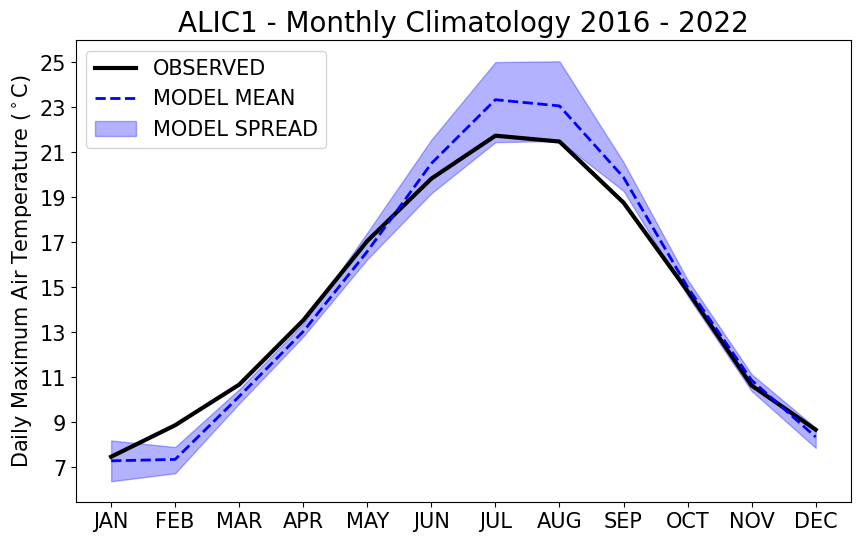

In [ ]:
# Plotting monthly climatology of Daily Maximum Air Temperature from COSMOS station ALIC1 and nearest grid point on CHESS-SCAPE averaged over 2016--2022
fig = plt.figure(figsize=(10, 6))
plt.plot(months, df_site.values, color="k", lw=3, label="OBSERVED")
plt.plot(months, df_model_mn.values, color="b", ls="--", lw=2, label="MODEL MEAN")
plt.fill_between(
    months,
    df_model_min.values,
    df_model_max.values,
    color="b",
    alpha=0.3,
    label="MODEL SPREAD",
)
plt.ylabel("Daily Maximum Air Temperature ($^\circ$C)", fontsize=15)
plt.yticks(np.arange(7, 26, 2), fontsize=15)
plt.xticks(fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.title(site_nm + " - Monthly Climatology 2016 - 2022", fontsize=20)
plt.show()

## 2.3.4. Others

There are several other ways to access data remotely, and increasingly, most of these methods are being supported by cloud-based infrastructure.  

  - Emerging cloud-native standards, such as the Spatiotemporal Asset Catalog (STAC), enable efficient cataloging and discovery of satellite or gridded climate data across distributed systems. These are often integrated with cloud platforms, allowing users to search and access data programmatically with minimal overhead. For example, [ECMWF Data Stores STAC Catalogue API](https://cds.climate.copernicus.eu/stac-browser/?.language=en).
  - Sensor Observation Services (SOS) are also available and are particularly useful for accessing real-time or near-real-time observations, especially from in-situ sensor networks or environmental monitoring platforms. For example, [UK AIR](https://uk-air.defra.gov.uk/data/data-availability). In the near future, the [FDRI project](https://fdri.org.uk/) will provide monitoring data covering the whole hydrological system.
  - Finally, platforms such as [Google Earth Engine (GEE)](https://developers.google.com/earth-engine/datasets) and other open data cube frameworks enable users to query and analyze massive gridded datasets remotely, leveraging built-in computational resources—eliminating the need to download data locally. The GEE platform offers [comprehensive tutorials](https://developers.google.com/earth-engine/guides/getstarted) that guide users through its functionality. As a self-learning exercise, we have included a GitHub repository developed at UKCEH, linked in this workshop’s directory. It provides step-by-step training on [extracting drought indicators using GEE in Python](https://github.com/eugmag/Google_Earth_Engine_python_demo/tree/main), allowing you to follow along at your own pace.

# Thank you! Come talk to us about what sort of data are you looking to download and/or access?